# Kinematics and Kinetics of a Four Bar Linkage

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as sciopt

In [2]:
def plot_vector(x_s,x_e):
    plt.plot([x_s[0],x_e[0]],[x_s[1],x_e[1]])
    

## Initial parameters

In [3]:
theta2 = np.deg2rad(60)
l1 = 482.6/ 1000
l2 = 127/ 1000
l3 = 381/ 1000
l4 = 254/ 1000

## Position analysis

There are two equivalent functions shown below: 
- position_residual(theta2,theta3,theta4,l1,l2,l3,l4)
- position_residual2(theta2,theta3,theta4,l1,l2,l3,l4)
You can use any one of those to find the position of theta3, theta4

In [4]:

def position_residual(theta1,theta2,theta3,theta4,l1,l2,l3,l4):
    
    res = l2 * np.exp(1j * theta2) + l3 * np.exp(1j *theta3) - l4 * np.exp(1j *theta4) - l1 * np.exp(1j * theta1)

    return np.array([np.real(res),np.imag(res)])

def position_residual2(theta1,theta2,theta3,theta4,l1,l2,l3,l4):     
    eq1 = l2 * np.cos(theta2) + l3 * np.cos(theta3) - l4 * np.cos(theta4) - l1 * np.cos(theta1)
    eq2 = l2 * np.sin(theta2) + l3 * np.sin(theta3) - l4 * np.sin(theta4) - l1 * np.sin(theta1)
    res = np.array([eq1,eq2])
    return res


def solve_function(x):
    
    return position_residual(0,theta2,x[0],x[1],l1,l2,l3,l4)

theta3,theta4 = sciopt.fsolve(solve_function,[0,0])

np.rad2deg([theta3,theta4])

array([ 20.91722487, 104.40972127])

## Plot the mechanism

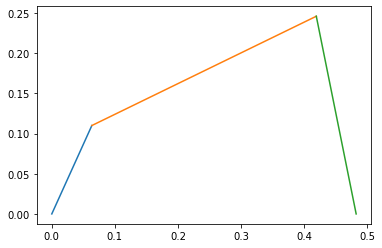

In [5]:
xA,yA = np.cos(theta2)*l2 , np.sin(theta2)*l2
xB,yB = xA + np.cos(theta3)*l3 , yA + np.sin(theta3)*l3
xO4,yO4 = l1,0

plt.figure(1)
# plt.plot([0,xA],[0,yA])
# plt.plot([xA,xB],[yA,yB])
# plt.plot([xO4,xB],[yO4,yB])
plot_vector([0,0],[xA,yA])
plot_vector([xA,yA],[xB,yB])
plot_vector([xB,yB],[xO4,yO4])


## Velocity analysis

In [6]:
w2 = 25

In [7]:
A = np.array([[-l3 * np.cos(theta3),l4*np.cos(theta4)],[-l3 * np.sin(theta3),l4*np.sin(theta4)]]) 
b = l2 * np.array([np.cos(theta2),np.sin(theta2)]) * w2

w3,w4 = np.linalg.solve(A,b)

print(w3,w4)

-5.869354068471628 7.931634292025387


## Acceleration analysis


### The given angular acceleration

In [8]:
alpha2 = 0

### Solve the unknown parameters

In [9]:

A_acc = np.array([[l3 * np.real(np.exp(1j * theta3) * 1j), -l4 * np.real(np.exp(1j * theta4) * 1j)],
                  [l3 * np.imag(np.exp(1j * theta3) * 1j), -l4 * np.imag(np.exp(1j * theta4) * 1j)]])

b2 = np.array([np.real(l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2)),
               np.imag(l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2))])

b3 = np.array([np.real(l3 * (-np.exp(1j*theta3)*w3**2)),
               np.imag(l3 * (-np.exp(1j*theta3)*w3**2))])
                     
b4 = np.array([np.real(-l4 * (-np.exp(1j*theta4)*w4**2)),
               np.imag(-l4 * (-np.exp(1j*theta4)*w4**2))])

                     

b_acc = -b2 - b3 - b4

np.linalg.solve(A_acc,b_acc)


array([111.50587893, 288.97971394])

In [10]:

def residual_acceleration(x):
    
    alpha3,alpha4 = x
    
    term2 = l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2)
    
    term3 = l3 * (-np.exp(1j*theta3)*w3**2 + 1j * np.exp(1j*theta3) * alpha3)
    
    term4 = - l4 * (-np.exp(1j*theta4)*w4**2 + 1j * np.exp(1j*theta4) * alpha4)
    
    residual = term2  + term3 + term4

    return np.array([np.real(residual),np.imag(residual)])

alpha3,alpha4 = sciopt.fsolve(residual_acceleration,[0,0])

print(alpha3,alpha4,residual_acceleration([alpha3,alpha4]))


111.50587892725167 288.9797139437731 [-1.42108547e-14 -7.10542736e-15]


## Positions of centre of mass

### Known parameters

In [11]:
l_G2O2 = 76.2 / 1000
l_G3A  = 228.6 / 1000
l_EA   = 294.8328896404719 / 1000
l_G4O4 = 127 / 1000

thetaG2 = np.deg2rad(30) 
thetaG3 = np.deg2rad(45) 
thetaG4 = np.deg2rad(0) 
thetaE  = np.deg2rad(74.26250649302872)


### Positions

In [12]:
xO2 = 0 + 0j
xA  = l2 * np.exp(1j * theta2)
xB  = xA + l3 * np.exp(1j * theta3)
xO4 = l1 + 0j

xG2 = xO2 + l_G2O2 * np.exp(1j * (theta2 + thetaG2))

xG3 = xA + l_G3A * np.exp(1j * (theta3 + thetaG3))

xE  = xA + l_EA * np.exp(1j * (theta3 + thetaE))

xG4 = xO4 + l_G4O4 * np.exp(1j * (theta4 + thetaG4))

print(xG4)


(0.45099551388226333+0.12300470095583253j)


## Relative position vectors - used in the calculations of the moments:

In [13]:
r_O2G2 = xO2 - xG2
r_AG2  = xA  - xG2
r_AG3  = xA  - xG3
r_BG3  = xB  - xG3
r_BG4  = xB  - xG4
r_O4G4 = xO4 - xG4
r_EG3   = xE  - xG3

## Dynamic analysis

In [14]:
decompose_real_imag = lambda x: (np.real(x), np.imag(x))

In [15]:
x_O2G,y_O2G = decompose_real_imag(r_O2G2)
x_AG2,y_AG2 = decompose_real_imag(r_AG2)
x_AG3,y_AG3 = decompose_real_imag(r_AG3)
x_BG3,y_BG3 = decompose_real_imag(r_BG3)
x_BG4,y_BG4 = decompose_real_imag(r_BG4)
x_O4G4,y_O4G4 = decompose_real_imag(r_O4G4)

x_EG3,y_EG3 = decompose_real_imag(r_EG3)


### Given mass parameters

In [16]:
m2 = 0.680
m3 = 3.493
m4 = 2.631

Ig2 = 0.006
Ig3 = 0.011 
Ig4 = 0.090

### External load parameters

In [17]:
fex = 308.184
fey = -177.930
T4 = 13.558

In [18]:
alpha_g2 = float(alpha2)
alpha_g3 = float(alpha3)
alpha_g4 = float(alpha4)

In [19]:
def linear_acceleration_of_point_P(aA,lPA,theta,omega,alpha,thetaP):
    
    aP = aA + lPA * np.exp(1j * (theta + thetaP)) * (-omega**2 + alpha * 1j)
    
    return aP 

In [20]:
aG2 = linear_acceleration_of_point_P(0j,l_G2O2,theta2,w2,alpha2,thetaG2)

aA = linear_acceleration_of_point_P(0j,l2,theta2,w2,alpha2,0)

aG3 = linear_acceleration_of_point_P(aA,l_G3A,theta3,w3,alpha3,thetaG3)

aG4 = linear_acceleration_of_point_P(0j,l_G4O4,theta4,w4,alpha4,thetaG4)

print(aG2)
print(aG3)
print(aG4)

(-2.916190190469635e-15-47.625j)
(-66.17248149081468-65.52895856514762j)
(-33.557599078258114-16.871382271360925j)


In [21]:
a_G2x,a_G2y = decompose_real_imag(aG2)
a_G3x,a_G3y = decompose_real_imag(aG3)
a_G4x,a_G4y = decompose_real_imag(aG4)

In [22]:

A_row1 = [1,0,1,0,0,0,0,0,0]
A_row2 = [0,1,0,1,0,0,0,0,0]
A_row3 = [-y_O2G,x_O2G,-y_AG2,x_AG2,0,0,0,0,1]
A_row4 = [0,0,-1,0,1,0,0,0,0]
A_row5 = [0,0,0,-1,0,1,0,0,0]
A_row6 = [0,0,y_AG3,-x_AG3,-y_BG3,x_BG3,0,0,0]
A_row7 = [0,0,0,0,-1,0,1,0,0]
A_row8 = [0,0,0,0,0,-1,0,1,0]
A_row9 = [0,0,0,0,y_BG4,-x_BG4,-y_O4G4,x_O4G4,0]

A_matrix = np.array([A_row1,A_row2,A_row3,A_row4,A_row5,A_row6,A_row7,A_row8,A_row9])

b_vector = np.array([
                     m2 * a_G2x,
                     m2 * a_G2y,
                     Ig2 * alpha_g2,
                     m3 * a_G3x - fex,
                     m3 * a_G3y - fey, 
                     Ig3 * alpha_g3 - (x_EG3 * fey - y_EG3 * fex),
                     m4 * a_G4x, 
                     m4 * a_G4y,     
                     Ig4 * alpha_g4 - T4,
                    ])

x = np.linalg.solve(A_matrix,b_vector)

## Forces at the nodes

In [23]:
fO2x = x[0]
fO2y = x[1] 
fA2x = x[2] 
fA2y = x[3] 
fB3x = x[4] 
fB3y = x[5] 
fO4x = x[6] 
fO4y = x[7] 
T2   = x[8]

labels = ["fO2x","fO2y","fA2x","fA2y","fB3x","fB3y","fO4x","fO4y","T2"]
for i,j in zip(labels,x):
    print("{}={}".format(i,j))


fO2x=-555.939749461331
fO2y=-409.6562435564391
fA2x=555.939749461331
fA2y=377.2712435564391
fB3x=16.615271613915255
fB3y=326.30859128837847
fO4x=-71.67477156098184
fO4y=281.91998453242786
T2=37.18843517706384


In [24]:

# theta2 = np.pi

fO2 = fO2x + 1j * fO2y
uO2A = np.exp(1j*theta2)

print(fO2)
print(uO2A)

def dot_complex_rep(a,b): 
    
    return np.real(a) * np.real(b) + np.imag(a) * np.imag(b) 

fO2_n = dot_complex_rep(fO2,uO2A) * uO2A

print(fO2_n)

fO2_t = fO2 - fO2_n

fA2 = fA2x + 1j * fA2y
fA2_n = fA2 * uO2A
fA2_t = fA2 - fA2_n

print(np.abs(fO2_n),np.abs(fO2_t))
print(np.abs(fA2_n),np.abs(fA2_t))



(-555.939749461331-409.6562435564391j)
(0.5000000000000001+0.8660254037844386j)
(-316.37129423472356-547.9711556708637j)
632.742588469447 276.6298242288492
671.8650134109897 671.8650134109897


In [25]:
np.linalg.norm([x[0],x[1]])

690.5702302560544

In [26]:
np.linalg.norm([x[2],x[3]])

671.8650134109897

In [27]:
np.linalg.norm([x[4],x[5]])

326.73133305425455

In [28]:
np.linalg.norm([x[6],x[7]])

290.8885534995891

In [29]:
import scipy.optimize as sciopt
import numpy as np 

In [30]:
theta2v = np.arange(0,1,0.001)
data = []

alpha3,alpha4 = [0,0]
theta3,theta4 = [0,0]

for theta2 in (theta2v):
    
    l1 = 482.6/ 1000
    l2 = 127/ 1000
    l3 = 381/ 1000
    l4 = 254/ 1000

    w2 = 50

    alpha2 = -40

    l_G2O2 = 76.2 / 1000
    l_G3A  = 228.6 / 1000
    l_EA   = 294.8328896404719 / 1000
    l_G4O4 = 127 / 1000

    thetaG2 = np.deg2rad(30) 
    thetaG3 = np.deg2rad(45) 
    thetaG4 = np.deg2rad(0) 
    thetaE  = np.deg2rad(74.26250649302872)

    m2 = 0.680 * 2
    m3 = 3.493 * 2
    m4 = 2.631 * 2

    Ig2 = 0.006 * 2
    Ig3 = 0.011 * 2 
    Ig4 = 0.090 * 2

    fex = 308.184
    fey = -177.930
    T4 = 13.558

    def position_residual(theta1,theta2,theta3,theta4,l1,l2,l3,l4):     
        eq1 = l2 * np.cos(theta2) + l3 * np.cos(theta3) - l4 * np.cos(theta4) - l1 * np.cos(theta1)
        eq2 = l2 * np.sin(theta2) + l3 * np.sin(theta3) - l4 * np.sin(theta4) - l1 * np.sin(theta1)
        res = np.array([eq1,eq2])
        return res

    def solve_function(x):

        return position_residual(0,theta2,x[0],x[1],l1,l2,l3,l4)

    theta3,theta4 = sciopt.fsolve(solve_function,[theta3,theta4])

    A = np.array([[-l3 * np.cos(theta3),l4*np.cos(theta4)],[-l3 * np.sin(theta3),l4*np.sin(theta4)]]) 
    b = l2 * np.array([np.cos(theta2),np.sin(theta2)]) * w2

    w3,w4 = np.linalg.solve(A,b)

    def residual_acceleration(x):

        alpha3,alpha4 = x

        term2 = l2 * (-np.exp(1j*theta2) * w2**2 + np.exp(1j*theta2) * 1j * alpha2)

        term3 = l3 * (-np.exp(1j*theta3)*w3**2 + 1j * np.exp(1j*theta3) * alpha3)

        term4 = - l4 * (-np.exp(1j*theta4)*w4**2 + 1j * np.exp(1j*theta4) * alpha4)

        residual = term2  + term3 + term4

        return np.array([np.real(residual),np.imag(residual)])

    alpha3,alpha4 = sciopt.fsolve(residual_acceleration,[alpha3,alpha4])

    xO2 = 0 + 0j
    xA  = l2 * np.exp(1j * theta2)
    xB  = xA + l3 * np.exp(1j * theta3)
    xO4 = l1 + 0j

    xG2 = xO2 + l_G2O2 * np.exp(1j * (theta2 + thetaG2))

    xG3 = xA + l_G3A * np.exp(1j * (theta3 + thetaG3))

    xE  = xA + l_EA * np.exp(1j * (theta3 + thetaE))

    xG4 = xO4 + l_G4O4 * np.exp(1j * (theta4 + thetaG4))

    r_O2G2 = xO2 - xG2
    r_AG2  = xA  - xG2
    r_AG3  = xA  - xG3
    r_BG3  = xB  - xG3
    r_BG4  = xB  - xG4
    r_O4G4 = xO4 - xG4
    r_EG3   = xE  - xG3

    decompose_real_imag = lambda x: (np.real(x), np.imag(x))

    x_O2G,y_O2G = decompose_real_imag(r_O2G2)
    x_AG2,y_AG2 = decompose_real_imag(r_AG2)
    x_AG3,y_AG3 = decompose_real_imag(r_AG3)
    x_BG3,y_BG3 = decompose_real_imag(r_BG3)
    x_BG4,y_BG4 = decompose_real_imag(r_BG4)
    x_O4G4,y_O4G4 = decompose_real_imag(r_O4G4)

    x_EG3,y_EG3 = decompose_real_imag(r_EG3)
    
    alpha_g2 = float(alpha2)
    alpha_g3 = float(alpha3)
    alpha_g4 = float(alpha4)

    def linear_acceleration_of_point_P(aA,lPA,theta,omega,alpha,thetaP):

        aP = aA + lPA * np.exp(1j * (theta + thetaP)) * (-omega**2 + alpha * 1j)

        return aP 

    aG2 = linear_acceleration_of_point_P(0j,l_G2O2,theta2,w2,alpha2,thetaG2)

    aA = linear_acceleration_of_point_P(0j,l2,theta2,w2,alpha2,0)

    aG3 = linear_acceleration_of_point_P(aA,l_G3A,theta3,w3,alpha3,thetaG3)

    aG4 = linear_acceleration_of_point_P(0j,l_G4O4,theta4,w4,alpha4,thetaG4)

    a_G2x,a_G2y = decompose_real_imag(aG2)
    a_G3x,a_G3y = decompose_real_imag(aG3)
    a_G4x,a_G4y = decompose_real_imag(aG4)


    A_row1 = [1,0,1,0,0,0,0,0,0]
    A_row2 = [0,1,0,1,0,0,0,0,0]
    A_row3 = [-y_O2G,x_O2G,-y_AG2,x_AG2,0,0,0,0,1]
    A_row4 = [0,0,-1,0,1,0,0,0,0]
    A_row5 = [0,0,0,-1,0,1,0,0,0]
    A_row6 = [0,0,y_AG3,-x_AG3,-y_BG3,x_BG3,0,0,0]
    A_row7 = [0,0,0,0,-1,0,1,0,0]
    A_row8 = [0,0,0,0,0,-1,0,1,0]
    A_row9 = [0,0,0,0,y_BG4,-x_BG4,-y_O4G4,x_O4G4,0]

    A_matrix = np.array([A_row1,A_row2,A_row3,A_row4,A_row5,A_row6,A_row7,A_row8,A_row9])

    b_vector = np.array([
                         m2 * a_G2x,
                         m2 * a_G2y,
                         Ig2 * alpha_g2,
                         m3 * a_G3x - fex,
                         m3 * a_G3y - fey, 
                         Ig3 * alpha_g3 - (x_EG3 * fey - y_EG3 * fex),
                         m4 * a_G4x, 
                         m4 * a_G4y,     
                         Ig4 * alpha_g4 - T4,
                        ])

    x = np.linalg.solve(A_matrix,b_vector)

    data.append(x)
    
    fO2x = x[0]
    fO2y = x[1] 
    fA2x = x[2] 
    fA2y = x[3] 
    fB3x = x[4] 
    fB3y = x[5] 
    fO4x = x[6] 
    fO4y = x[7] 
    T2   = x[8]


In [31]:

data = np.array(data)


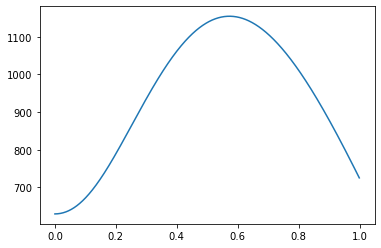

In [32]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(theta2v,np.sqrt(data[:,6]**2 + data[:,7]**2))